In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Advanced Python Lab Assignment

### Linear Regression on Companies Dataset.

In [103]:
data= pd.read_csv('1000_Companies.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Here, we will show how the attribute Profit increases or decreases depending on the other attributes of the dataset. 

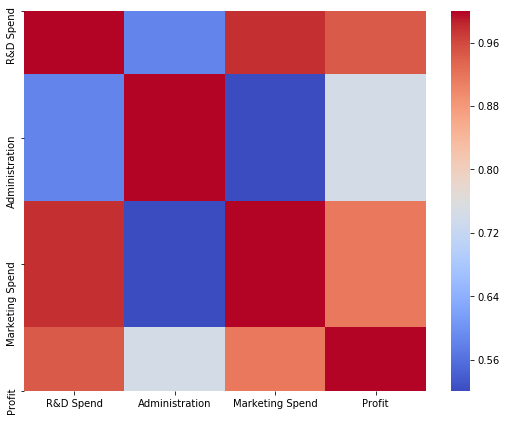

In [104]:
plt.figure(figsize=(9,7))
sns.heatmap(data.corr(),cmap= 'coolwarm')


We observe that Profit is the most co-related to R&D Spend, then to Marketting and then to Administration.

Now we will split our data to training data and test data.

In [105]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [106]:
a1= data[['R&D Spend']]
a2 = data[['Administration']]
a3 = data[['Marketing Spend']]
p1= data[['Profit']]
a1.head()

,R&D Spend
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


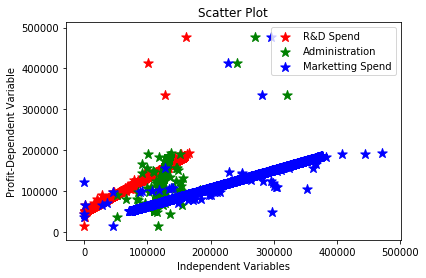

In [107]:
plt.scatter(a1,p1, label='R&D Spend', color='r',s=100,marker='*')
plt.scatter(a2,p1, label='Administration', color='g',s=100,marker='*')
plt.scatter(a3,p1, label='Marketting Spend', color='b',s=100,marker='*')

plt.title('Scatter Plot')
plt.xlabel('Independent Variables')
plt.ylabel('Profit-Dependent Variable')

plt.legend()

plt.show()

In [108]:
X = data[['R&D Spend','Administration','Marketing Spend']]
X.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [109]:
y = data[['Profit']]
y.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 0)

In [111]:
len(X)#total number of records

1000

Here we take 30% of the data as testing data and 70% of the data as training data, that is we train with 1700 data records and test with 300 data records.

In [112]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

The model is created and trained.

In [113]:
y_pred= reg.predict(X_test)
y_pred

array([[ 88956.51235675],
       [ 87590.33288232],
       [ 94070.44261188],
       [175895.04692542],
       [ 83264.8145068 ],
       [110477.49237073],
       [131430.2598783 ],
       [ 90642.52735311],
       [164607.08606112],
       [ 53200.26939431],
       [ 66071.93223218],
       [150732.06810844],
       [126152.87519631],
       [ 58444.88520795],
       [176849.39498851],
       [ 75153.71533755],
       [118351.29429923],
       [163884.87669731],
       [175400.90815642],
       [182112.92585765],
       [124261.66808511],
       [ 84827.88205071],
       [181217.0423071 ],
       [ 83300.06523457],
       [104201.14892595],
       [100421.58636367],
       [ 56176.51178313],
       [ 56683.21021556],
       [ 68021.89761145],
       [211034.28879633],
       [120886.76507098],
       [110933.17209544],
       [101375.93452471],
       [138100.28197215],
       [ 63085.94027719],
       [108060.67022905],
       [186066.16240107],
       [171648.62759104],
       [1748

In [114]:
len(y_pred)

300

Hence we get the prediction of 300 test values for profit.

In [115]:
print(reg.coef_)

[[0.5279265  0.97951507 0.09701325]]


These are the co-efficients(weight) by which the independent variables R&D Spend,Administration and Marketing Spend effect Profit.

In [116]:
print(reg.intercept_)

[-66146.01572225]


This value represents the intercept of the regression line in the y-axis.

In [117]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9312800781130098

So, y_test was the actual value corresponding to X_test and y_pred is the set of values we predicted for X_test using our regression model.
This r_score value gives us the percentage of accuracy of our model. Our model gets an accuracy of 93%.

Text(0, 0.5, 'y_pred')

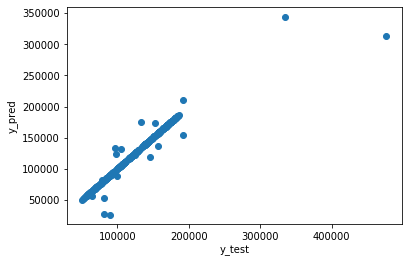

In [118]:

plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

This scatter plot compares the test values of y and values of y predicted by our model.

# Classification model for Analytics lab assignment

In [56]:
from sklearn.datasets import load_iris
import pandas as pd

In [57]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [58]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [60]:
X1 = iris.data
y1 = iris.target

In [67]:

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size= 0.3, random_state= 0)

## KNeighbourClassifier method

If you are similar to your neighbours then you are one of them.

In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X1_train, y1_train)
y1_pred=knn1.predict(X1_test)
y1_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

This knn model has a k-value of 1. Here i have taken random 30% of the sample data as my test data and used my model knn1 on it to predict the response corresponding to the iris flower species.  0 corresponds for setose, 1 for versicolor and 2 for virginica.

In [84]:
knn1.score(X1_test,y1_test)

0.9777777777777777

In [85]:
accuracy_score(y1_test,y1_pred)

0.9777777777777777

These methods give us the accuracy of our knn1 model.

In [86]:
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X1_train, y1_train)
y2_pred = knn2.predict(X1_test)
y2_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

Here, the knn model has a k-value of 5, anf the test values are data not specific to the given dataset. The output gives us an array of response from the training dataset and the response values corresponds to the flower species. 0 corresponds for setose, 1 for versicolor and 2 for virginica.

In [87]:
knn2.score(X1_test,y1_test)

0.9777777777777777

In [88]:
accuracy_score(y1_test,y2_pred)

0.9777777777777777

These methods give us the accuracy of our knn2 model.